In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("Salary Data.csv")


In [3]:
#wydzielenie list kolumn numerycznych i kategorialnych
numeric_cols = ['Age','Years of Experience']
categorical_cols =['Gender','Education Level', 'Job Title']

for feature in categorical_cols:
    uniques = data[feature].unique()
    print('Feature:','\n',feature, '\n', uniques,'\n','--'*40,'\n')

Feature: 
 Gender 
 ['Male' 'Female' nan] 
 -------------------------------------------------------------------------------- 

Feature: 
 Education Level 
 ["Bachelor's" "Master's" 'PhD' nan] 
 -------------------------------------------------------------------------------- 

Feature: 
 Job Title 
 ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep'

In [4]:
for feature in numeric_cols:
    uniques = data[feature].unique()
    print('Feature:','\n',feature, '\n', uniques,'\n','--'*40,'\n') # brak wartości odstających w zbiorze

Feature: 
 Age 
 [32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. nan] 
 -------------------------------------------------------------------------------- 

Feature: 
 Years of Experience 
 [ 5.   3.  15.   7.  20.   2.  12.   4.   1.  10.  18.   6.  14.  16.
  0.  22.  19.   9.  13.  11.  25.  21.   8.  17.  23.  24.   0.5  1.5
  nan] 
 -------------------------------------------------------------------------------- 



In [5]:
data.isnull().sum() #liczba pustych wartości w danych

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
data.dropna(inplace=True) #usunięcie wierszy z pustymi wartościami
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [7]:
data[categorical_cols] = data[categorical_cols].apply(LabelEncoder().fit_transform)
    
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


<AxesSubplot:>

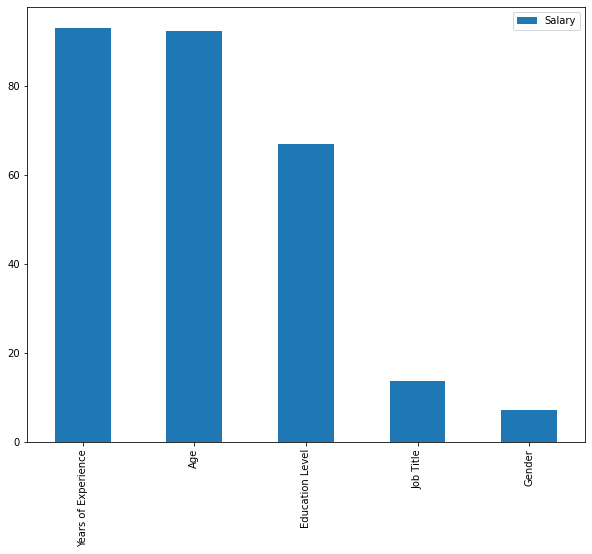

In [8]:
#korelacja cech ze zmienną Salary
pd.DataFrame(abs(data.corr()['Salary'].drop('Salary')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))
#najsilniej skorelowane zmienne ze zmienną Salary to lata doświadczenia, wiek i poziom edukacji

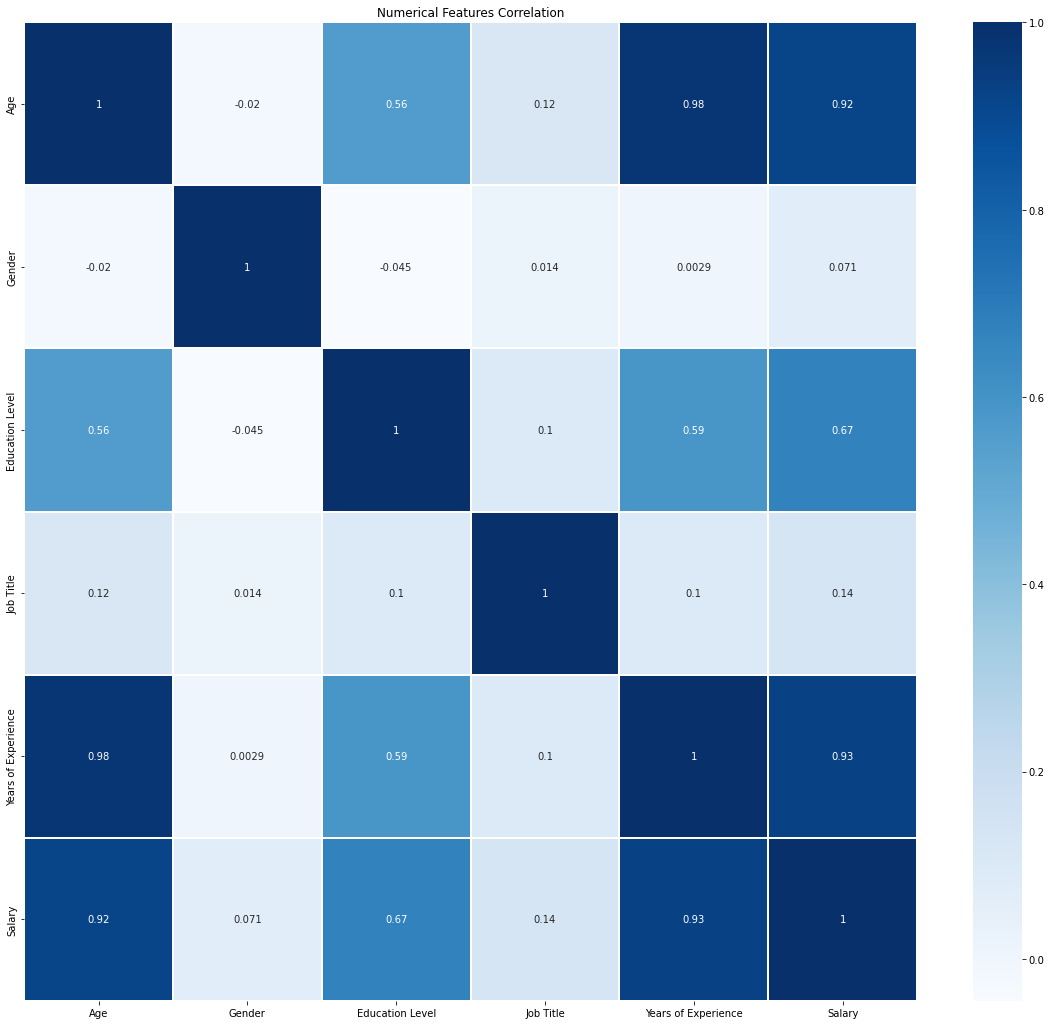

In [9]:
#korelacje cech numerycznych
plt.figure(figsize = (20,18))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,cmap='Blues')
plt.title('Numerical Features Correlation')
plt.show() #duże korelacje pomiędzy zmiennymi dotyczącymi wieku, doświadczenia i poziomu edukacji

<BarContainer object of 3 artists>

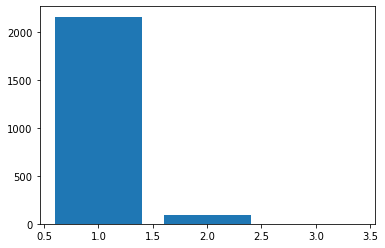

In [10]:
data_clean = data.copy()
x_clean = data_clean.drop(columns=['Salary'])
y_clean = data_clean.Salary

from sklearn.decomposition import PCA #redukcja wymiarowości z analizą głównych składowych
pca = PCA(n_components=3) #redukacja 6 atrybutów na 3 atrybuty
pca_features = pca.fit_transform(x_clean)

pca_df = pd.DataFrame(data=pca_features, columns=['Atribute1','Atribute2','Atribute3'])
#wykres
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_) 

In [11]:
#zbiór z PCA
x_train2, x_test2, y_train2, y_test2 = train_test_split(pca_df,y_clean,test_size=0.30,random_state=32)
x_train2.head(5)

,Atribute1,Atribute2,Atribute3
72,-9.274544,9.444695,-0.543662
223,31.240712,-11.649459,0.503667
367,41.115258,-6.392750,-1.452864
79,81.174668,-8.317864,-0.286004
134,17.278086,-13.393433,0.484956


In [12]:
#zbiór bez PCA
X = data.drop(columns=['Salary']) #podzielenie danych na zbiór testowy i treningowy
Y = data.Salary
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=32)
x_train.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience
72,45.0,1,2,99,16.0
224,28.0,1,0,59,2.0
369,33.0,1,0,49,4.0
79,30.0,0,0,9,3.0
134,27.0,1,0,73,1.0


In [13]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [14]:
#regresja wielomianowa stopnia 3
poly = PolynomialFeatures(degree=3,include_bias=False)
poly_features = poly.fit_transform(x_train2)
poly_features_test = poly.fit_transform(x_test2)

poly_reg = LinearRegression()
poly_reg.fit(poly_features, y_train2)

y_pred_poly_train = poly_reg.predict(poly_features)
poly_mae_train = mean_absolute_error(y_pred_poly_train, y_train2)

y_pred_poly_test = poly_reg.predict(poly_features_test)
poly_mae_test = mean_absolute_error(y_pred_poly_test, y_test2)

print(f"Treningowy: {poly_reg.score(poly_features, y_train2)}")
print(f"Testowy: {poly_reg.score(poly_features_test, y_test2)}")
print(f"MAE treningowy: {poly_mae_train}")
print(f"MAE testowy: {poly_mae_test}")

Treningowy: 0.8991283964713741
Testowy: 0.8849689419927078
MAE treningowy: 11041.130586187062
MAE testowy: 11101.209920876381


In [15]:
#regresja liniowa LASSO
reg_lasso = Lasso(alpha=1)
reg_lasso.fit(x_train2, y_train2)

y_pred_lasso_train = reg_lasso.predict(x_train2)
lasso_mae_train = mean_absolute_error(y_pred_lasso_train, y_train2)

y_pred_lasso_test = reg_lasso.predict(x_test2)
lasso_mae_test = mean_absolute_error(y_pred_lasso_test, y_test2)

print(f"Treningowy: {reg_lasso.score(x_train2, y_train2)}")
print(f"Testowy: {reg_lasso.score(x_test2, y_test2)}")
print(f"MAE trenigowy: {lasso_mae_train}")
print(f"MAE testowy: {lasso_mae_test}")

Treningowy: 0.8640580748806017
Testowy: 0.894765220187633
MAE trenigowy: 12784.381327691526
MAE testowy: 10893.122953726199


In [16]:
#regresja drzewa decyzyjnego
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(x_train2, y_train2)

y_pred_dt_train = dt_reg.predict(x_train2)
dt_mae_train = mean_absolute_error(y_pred_dt_train, y_train2)

y_pred_dt_test = dt_reg.predict(x_test2)
dt_mae_test = mean_absolute_error(y_pred_dt_test, y_test2)

print(f"Treningowy: {dt_reg.score(x_train2, y_train2)}")
print(f"Testowy: {dt_reg.score(x_test2, y_test2)}")
print(f"MAE treningowy: {dt_mae_train}")
print(f"MAE testowy: {dt_mae_test}") #średni błąd absolutny, czyli o ile średnio myli się model

Treningowy: 0.9583852641887952
Testowy: 0.8900390747730107
MAE treningowy: 7070.464131316057
MAE testowy: 10294.38150260104


In [17]:
#porównanie modeli
wyniki = pd.DataFrame({
    "Model regresji":['Wielomianowa st.3','LASSO','Drzewo decyzyjne'],
    "Dokładność treningowy":[poly_reg.score(poly_features, y_train2),
                             reg_lasso.score(x_train2, y_train2),
                            dt_reg.score(x_train2, y_train2)],
    "Dokładność testowy":[poly_reg.score(poly_features_test, y_test2),
                         reg_lasso.score(x_test2, y_test2),
                         dt_reg.score(x_test2, y_test2)],
    "MAE treningowy":[poly_mae_train,lasso_mae_train,dt_mae_train],
    
    "MAE testowy":[poly_mae_test,lasso_mae_test,dt_mae_test]

})
wyniki


,Model regresji,Dokładność treningowy,Dokładność testowy,MAE treningowy,MAE testowy
0,Wielomianowa st.3,0.899128,0.884969,11041.130586,11101.209921
1,LASSO,0.864058,0.894765,12784.381328,10893.122954
2,Drzewo decyzyjne,0.958385,0.890039,7070.464131,10294.381503
